In [55]:
df=read.csv("C:/Users/LENOVO/Desktop/sem II/R/ds/Logistic/New folder/Logistic_Regression/Social_Network_Ads.csv")

In [56]:
df

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0
15598044,Female,27,84000,0
15694829,Female,32,150000,1
15600575,Male,25,33000,0
15727311,Female,35,65000,0


In [57]:
str(df)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [58]:
df$Purchased=factor(df$Purchased)

In [59]:
str(df)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


In [60]:
library(ggplot2)

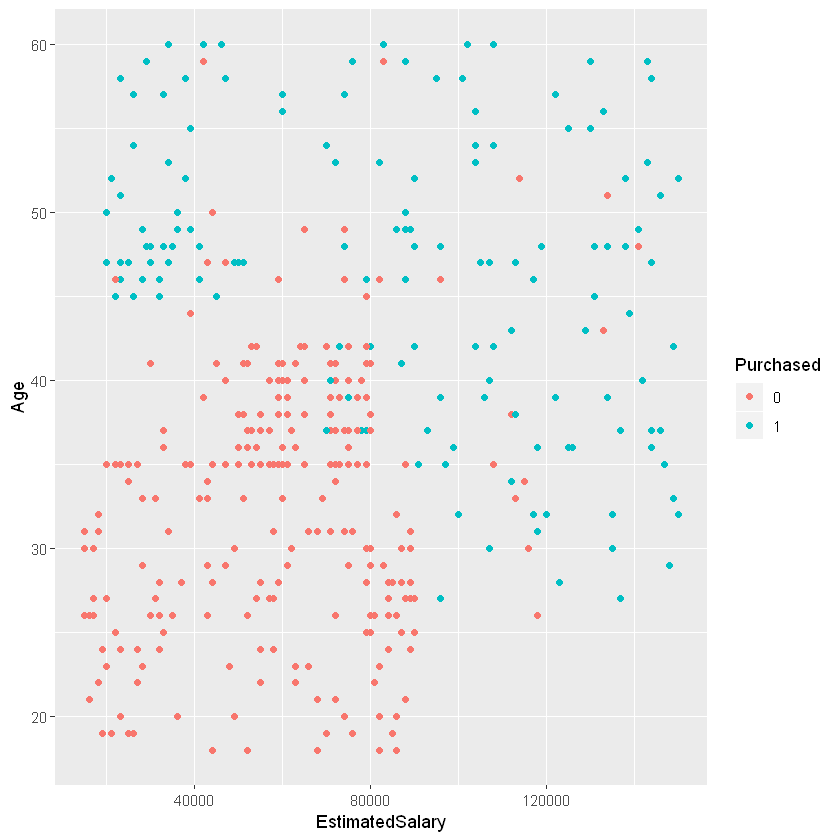

In [61]:
ggplot(df,aes(EstimatedSalary,Age)) + geom_point(aes(color=Purchased))

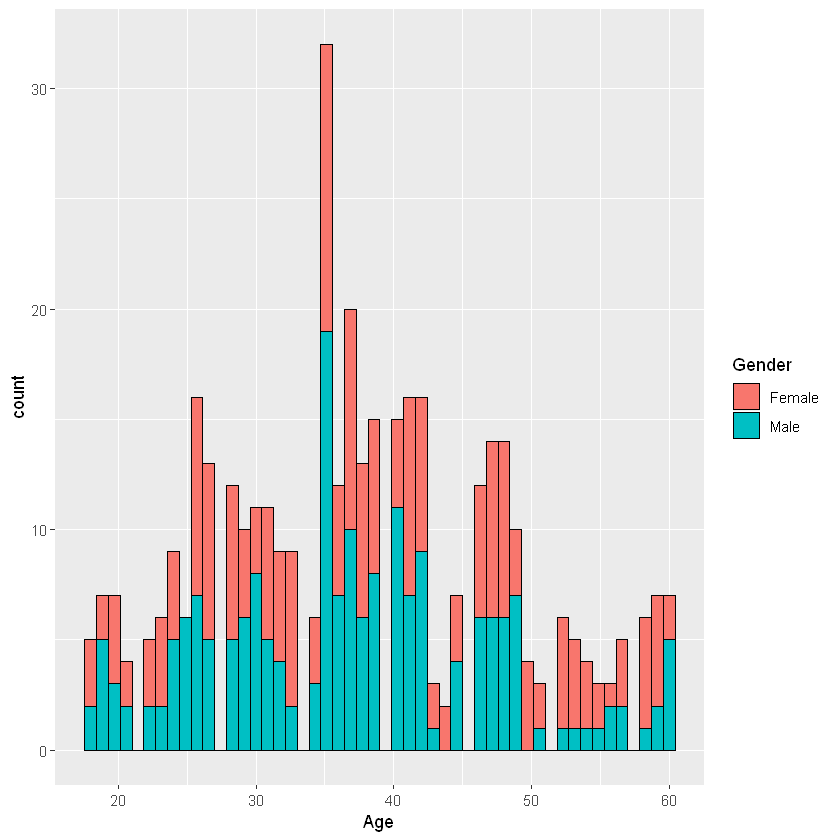

In [62]:
ggplot(df,aes(Age)) + geom_histogram(aes(fill=Gender),color='black',bins=50)

In [63]:
library(caTools)

set.seed(101) 

sample = sample.split(df$Purchased, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

In [67]:
library(rpart)

In [68]:
tree <- rpart(Purchased ~Age+EstimatedSalary,method='class',data = train)

In [69]:
tree.preds <- predict(tree,test)

In [70]:
head(tree.preds)

,0,1
3,0.9878788,0.01212121
8,0.2051282,0.79487179
12,0.9878788,0.01212121
14,0.9878788,0.01212121
15,0.9878788,0.01212121
20,0.1184211,0.88157895


In [71]:
names(tree.preds)<-c("No","Yes")
head(tree.preds)

,0,1
3,0.9878788,0.01212121
8,0.2051282,0.79487179
12,0.9878788,0.01212121
14,0.9878788,0.01212121
15,0.9878788,0.01212121
20,0.1184211,0.88157895


In [52]:
tree.preds=as.data.frame(tree.preds)

joiner=function(x){
    if(x>=0.5){
        return('Yes')
    }
    else{
        return('No')
    }
}

In [53]:
tree.preds$Purchased <- sapply(tree.preds$Yes,joiner)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Purchased, value = list()): replacement has 0 rows, data has 120


In [31]:
head(tree.preds)

,0,1
3,0.9878788,0.01212121
8,0.2051282,0.79487179
12,0.9878788,0.01212121
14,0.9878788,0.01212121
15,0.9878788,0.01212121
20,0.1184211,0.88157895


In [32]:
table(tree.preds$Purchased,test$Purchased)

ERROR: Error in table(tree.preds$Purchased, test$Purchased): all arguments must have the same length
